# Binary Logistic Regression

   # Definition:
        Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).


# Importing DATA & Python Packages
 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

I am using the HR (Human Resources) data which consists of 1470 rows and 35 features/columns/variables making a total of 51450 observations. The data consists a combination of characters and numerics. Our main objective is to find "Attrition Rate" so that we can identify when a new record feature comes close to attrition the algorithms warns the HR and necessary action is taken by HR

In [3]:
# Read CSV HR data file into DataFrame
hrdf = pd.read_csv("HRDATA.csv")
# Shape data
print('The shape of our features is:', hrdf.shape)
# Size of data
print("Size",hrdf.size)
# preview HR data
hrdf.head()


The shape of our features is: (1470, 35)
Size 51450


,Employee Count,Employee ID,Department,Job Role,Gender,Age,Over 18,Marital Status,Education,Education Field,...,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Performance Rating,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Y,Single,College,Life Sciences,...,6,4,0,5,Medium,0,Bad,Excellent,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Y,Married,Below College,Life Sciences,...,10,7,1,7,High,3,Better,Outstanding,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Y,Single,College,Other,...,0,0,0,0,Very High,3,Better,Excellent,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Y,Married,Master,Life Sciences,...,8,7,3,0,Very High,3,Better,Excellent,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Y,Married,Below College,Medical,...,2,2,2,2,Low,3,Better,Excellent,Very High,No


<font color=green>We need to convert all the character data into numerics i.e., converting them into categorirical data  or encoding them into numerics. I used excel as it is simpler and faster to encode. Python can also be used. </font>

In [4]:
# Read CSV HR data file into DataFrame
hrdf1 = pd.read_csv("HRDATA-1.csv")
# Shape data
print('The shape of our features is:', hrdf.shape)
# Size of data
print("Size",hrdf1.size)
# preview HR data
hrdf1.head()


The shape of our features is: (1470, 35)
Size 49980


,EmployeeCount,EmployeeID,Department,JobRole,Gender,Age,MaritalStatus,Education,EducationField,BusinessTravel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrmanager,EnvironmentSatisfaction,TrainingTimesLastYear,WorkLifeBalance,PerformanceRating,RelationshipSatisfaction,Attrition
0,1,1,3,8,0,41,1,2,2,1,...,6,4,0,5,2,0,1,1,1,1
1,1,2,2,7,1,49,2,1,2,2,...,10,7,1,7,3,3,3,2,4,0
2,1,4,2,3,1,37,1,2,5,1,...,0,0,0,0,4,3,3,1,2,1
3,1,5,2,7,0,33,2,4,2,2,...,8,7,3,0,4,3,3,1,3,0
4,1,7,2,3,1,27,2,1,4,1,...,2,2,2,2,1,3,3,1,4,0


# Data Quality & Missing Value Assessment

In [5]:
# check missing values in train data
hrdf1.isnull().sum()

EmployeeCount               0
EmployeeID                  0
Department                  0
JobRole                     0
Gender                      0
Age                         0
MaritalStatus               0
Education                   0
EducationField              0
BusinessTravel              0
DistanceFromHome(kms)       0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
HourlyRate(USD)             0
DailyRate(USD)              0
MonthlyRate(USD)            0
MonthlyIncome (USD)         0
SalaryHike(RS)              0
StockOptionLevel            0
StandardHours               0
OverTime                    0
No.ofCompaniesWorked        0
TotalWorkingYears           0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrmanager        0
EnvironmentSatisfaction     0
TrainingTimesLastYear       0
WorkLifeBalance             0
PerformanceRating           0
RelationshipSatisfaction    0
Attrition 

In [6]:
hrdf1.describe()

,EmployeeCount,EmployeeID,Department,JobRole,Gender,Age,MaritalStatus,Education,EducationField,BusinessTravel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrmanager,EnvironmentSatisfaction,TrainingTimesLastYear,WorkLifeBalance,PerformanceRating,RelationshipSatisfaction,Attrition
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,2.260544,5.423129,0.600000,36.923810,1.902721,2.912925,3.247619,1.086395,...,7.008163,4.229252,2.187755,4.123129,2.721769,2.799320,2.761224,1.153741,2.712245,0.161224
std,0.0,602.024335,0.527792,2.517848,0.490065,9.135373,0.730121,1.024165,1.331369,0.532170,...,6.126525,3.623137,3.222430,3.568136,1.093082,1.289271,0.706476,0.360824,1.081209,0.367863
min,1.0,1.000000,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,491.250000,2.000000,3.000000,0.000000,30.000000,1.000000,2.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.0,1020.500000,2.000000,6.000000,1.000000,36.000000,2.000000,3.000000,3.000000,1.000000,...,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,0.000000
75%,1.0,1555.750000,3.000000,8.000000,1.000000,43.000000,2.000000,4.000000,4.000000,1.000000,...,9.000000,7.000000,3.000000,7.000000,4.000000,3.000000,3.000000,1.000000,4.000000,0.000000
max,1.0,2068.000000,3.000000,9.000000,1.000000,60.000000,3.000000,5.000000,6.000000,2.000000,...,40.000000,18.000000,15.000000,17.000000,4.000000,6.000000,4.000000,2.000000,4.000000,1.000000


In [7]:
hrdf1['EmployeeCount'].value_counts()


1    1470
Name: EmployeeCount, dtype: int64

<font color=green> We can see in EployeeCount column is filled with "1" hence we remove it as 1 represents one employ as attrition is done for an employee </font>

In [8]:
hrdf1=hrdf1.drop("EmployeeCount",axis=1)

In [9]:
# Now we see correlation
hrdf1.corr()

,EmployeeID,Department,JobRole,Gender,Age,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome(kms),...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrmanager,EnvironmentSatisfaction,TrainingTimesLastYear,WorkLifeBalance,PerformanceRating,RelationshipSatisfaction,Attrition
EmployeeID,1.000000,-0.010895,-0.015045,0.022556,-0.010145,0.008155,0.042070,-0.002516,-0.018538,0.032916,...,-0.011240,-0.008416,-0.009019,-0.009197,0.017621,0.023603,0.010309,-0.020359,-0.069861,-0.010577
Department,-0.010895,1.000000,0.681268,-0.041583,-0.031882,-0.056073,0.007996,0.013720,-0.002640,0.017225,...,0.022920,0.056315,0.040061,0.034282,-0.019395,0.036875,0.026383,-0.024604,-0.022414,0.063991
JobRole,-0.015045,0.681268,1.000000,-0.041487,-0.117511,-0.069799,0.004530,0.023146,0.010802,0.000776,...,-0.077937,-0.023476,-0.041345,-0.036491,-0.015320,0.003947,0.023925,-0.022949,-0.023009,0.062999
Gender,0.022556,-0.041583,-0.041487,1.000000,-0.036311,0.047183,-0.016547,-0.002504,-0.044896,-0.001851,...,-0.029747,-0.041483,-0.026985,-0.030599,0.000508,-0.038787,-0.002753,-0.013859,0.022868,0.029453
Age,-0.010145,-0.031882,-0.117511,-0.036311,1.000000,0.095029,0.208034,-0.040873,-0.011807,-0.001686,...,0.311309,0.212901,0.216513,0.202089,0.010146,-0.019621,-0.021490,0.001904,0.053535,-0.159205
MaritalStatus,0.008155,-0.056073,-0.069799,0.047183,0.095029,1.000000,-0.004053,-0.014420,-0.030915,0.014437,...,0.059986,0.065822,0.030915,0.038570,0.003593,-0.010629,-0.014708,-0.005207,-0.022549,-0.162070
Education,0.042070,0.007996,0.004530,-0.016547,0.208034,-0.004053,1.000000,-0.039592,-0.008670,0.021042,...,0.069114,0.060236,0.054254,0.069065,-0.027128,-0.025100,0.009819,-0.024539,-0.009118,-0.031373
EducationField,-0.002516,0.013720,0.023146,-0.002504,-0.040873,-0.014420,-0.039592,1.000000,-0.023489,0.002013,...,-0.018692,-0.010506,0.002326,-0.004130,0.043163,0.049195,0.041191,-0.005614,-0.004378,0.026846
BusinessTravel,-0.018538,-0.002640,0.010802,-0.044896,-0.011807,-0.030915,-0.008670,-0.023489,1.000000,-0.009696,...,0.005212,-0.005336,0.005222,-0.000229,-0.011310,0.016357,0.004209,0.001683,0.008926,0.127006
DistanceFromHome(kms),0.032916,0.017225,0.000776,-0.001851,-0.001686,0.014437,0.021042,0.002013,-0.009696,1.000000,...,0.009508,0.018845,0.010029,0.014406,-0.016075,-0.036942,-0.026556,0.027110,0.006557,0.077924


In [10]:
hrdf1["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [11]:
hrdf1=hrdf1.drop("StandardHours",axis=1)

we are removing standard hours as it is a constant and holds no weight in the equation

In [12]:
# Now we see correlation
corr=hrdf1.corr()
corr

,EmployeeID,Department,JobRole,Gender,Age,MaritalStatus,Education,EducationField,BusinessTravel,DistanceFromHome(kms),...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrmanager,EnvironmentSatisfaction,TrainingTimesLastYear,WorkLifeBalance,PerformanceRating,RelationshipSatisfaction,Attrition
EmployeeID,1.000000,-0.010895,-0.015045,0.022556,-0.010145,0.008155,0.042070,-0.002516,-0.018538,0.032916,...,-0.011240,-0.008416,-0.009019,-0.009197,0.017621,0.023603,0.010309,-0.020359,-0.069861,-0.010577
Department,-0.010895,1.000000,0.681268,-0.041583,-0.031882,-0.056073,0.007996,0.013720,-0.002640,0.017225,...,0.022920,0.056315,0.040061,0.034282,-0.019395,0.036875,0.026383,-0.024604,-0.022414,0.063991
JobRole,-0.015045,0.681268,1.000000,-0.041487,-0.117511,-0.069799,0.004530,0.023146,0.010802,0.000776,...,-0.077937,-0.023476,-0.041345,-0.036491,-0.015320,0.003947,0.023925,-0.022949,-0.023009,0.062999
Gender,0.022556,-0.041583,-0.041487,1.000000,-0.036311,0.047183,-0.016547,-0.002504,-0.044896,-0.001851,...,-0.029747,-0.041483,-0.026985,-0.030599,0.000508,-0.038787,-0.002753,-0.013859,0.022868,0.029453
Age,-0.010145,-0.031882,-0.117511,-0.036311,1.000000,0.095029,0.208034,-0.040873,-0.011807,-0.001686,...,0.311309,0.212901,0.216513,0.202089,0.010146,-0.019621,-0.021490,0.001904,0.053535,-0.159205
MaritalStatus,0.008155,-0.056073,-0.069799,0.047183,0.095029,1.000000,-0.004053,-0.014420,-0.030915,0.014437,...,0.059986,0.065822,0.030915,0.038570,0.003593,-0.010629,-0.014708,-0.005207,-0.022549,-0.162070
Education,0.042070,0.007996,0.004530,-0.016547,0.208034,-0.004053,1.000000,-0.039592,-0.008670,0.021042,...,0.069114,0.060236,0.054254,0.069065,-0.027128,-0.025100,0.009819,-0.024539,-0.009118,-0.031373
EducationField,-0.002516,0.013720,0.023146,-0.002504,-0.040873,-0.014420,-0.039592,1.000000,-0.023489,0.002013,...,-0.018692,-0.010506,0.002326,-0.004130,0.043163,0.049195,0.041191,-0.005614,-0.004378,0.026846
BusinessTravel,-0.018538,-0.002640,0.010802,-0.044896,-0.011807,-0.030915,-0.008670,-0.023489,1.000000,-0.009696,...,0.005212,-0.005336,0.005222,-0.000229,-0.011310,0.016357,0.004209,0.001683,0.008926,0.127006
DistanceFromHome(kms),0.032916,0.017225,0.000776,-0.001851,-0.001686,0.014437,0.021042,0.002013,-0.009696,1.000000,...,0.009508,0.018845,0.010029,0.014406,-0.016075,-0.036942,-0.026556,0.027110,0.006557,0.077924


Text(0.5, 1, 'heatmap')

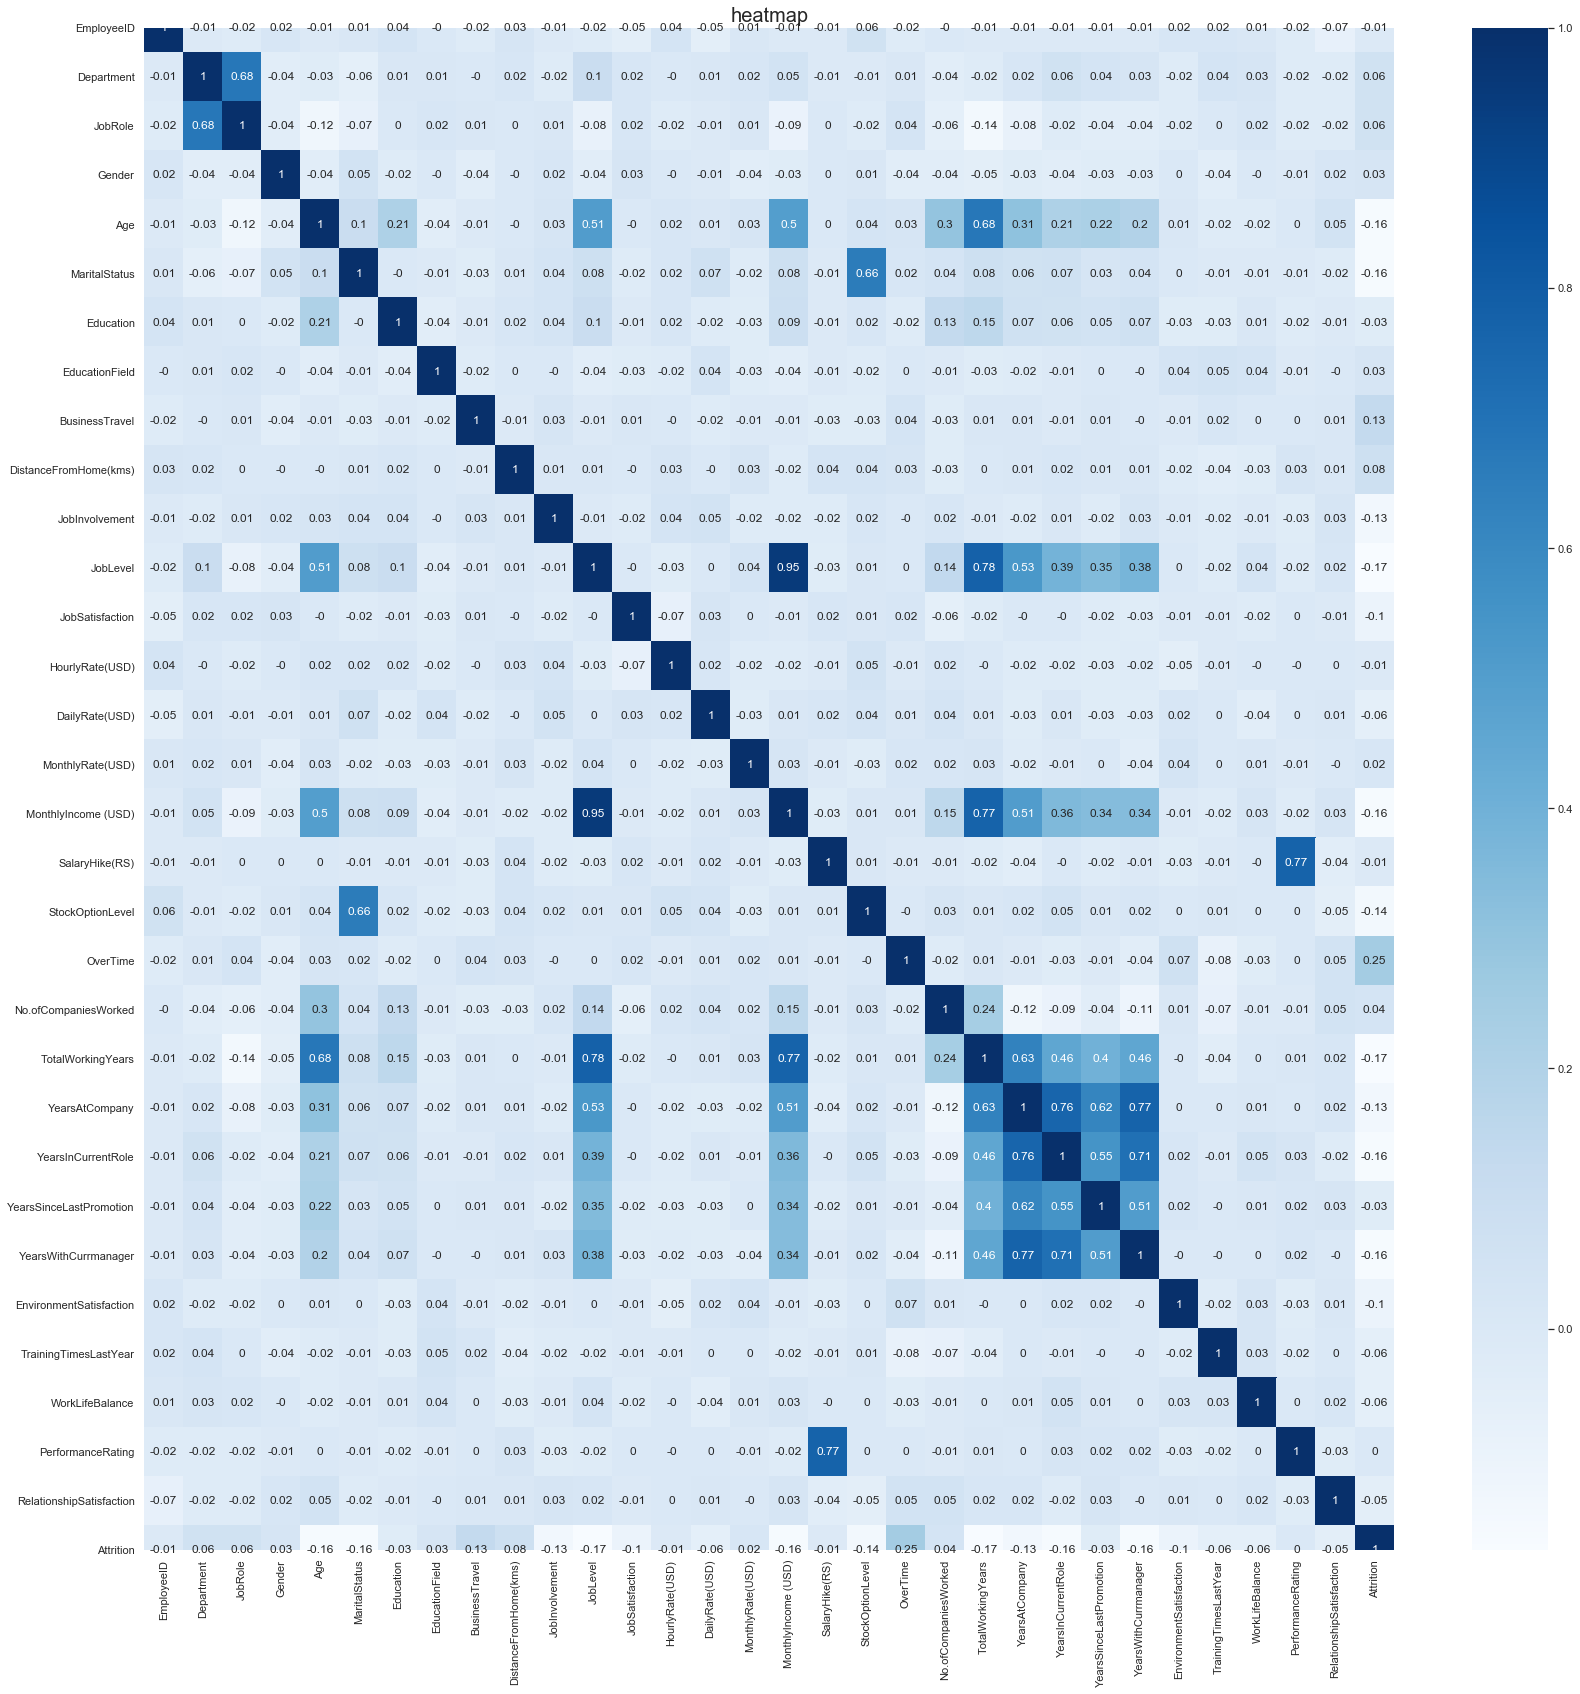

In [13]:

# Now heatmap 

plt.figure(figsize=(28,28))
sns.heatmap((round(corr,2)),annot=True,cmap="Blues")
plt.title('heatmap', fontsize=20)

In [14]:
# now we are taking the columns having maximum correlation
hrdf1.shape

(1470, 32)

# Spliting the data for trainig and testing

### The data set is partioned in the ratio (75:25) with 1102 records for training and 368 records for testing.  

In [15]:
#split the dataset in features and target variable

X= hrdf1.iloc[:,0:31]
y = hrdf1.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("Xtrain shape:",X_train.shape)
print("Xtest shape:",X_test.shape)
print("ytrain shape:",y_train.shape)
print("ytest shape:",y_test.shape)

Xtrain shape: (1102, 31)
Xtest shape: (368, 31)
ytrain shape: (1102,)
ytest shape: (368,)


In [16]:
#import the class
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg=LogisticRegression()

In [17]:
#fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [18]:
#import the metrics class
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix) #26 and 11 are incorrect predictions

[[304   6]
 [ 41  17]]


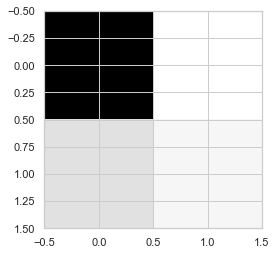

In [19]:
plt.imshow(cnf_matrix, cmap='binary')

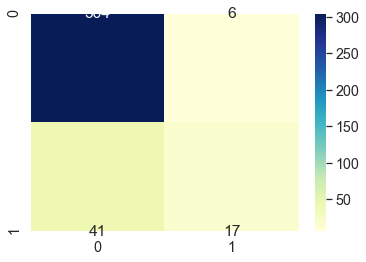

In [20]:
sns.set(font_scale=1.3)#for label size
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')


In [21]:
LogReg=LogisticRegression()
LogReg.fit(X,y)
print("Score ",LogReg.score(X,y))

Score  0.8680272108843538


In [22]:
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))


Accuracy: 0.8722826086956522
Precision: 0.7391304347826086
Recall: 0.29310344827586204


# From confusion matrix the model accuracy has been observed as 87%

# Classification Report

In [23]:
478
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       310
           1       0.74      0.29      0.42        58

    accuracy                           0.87       368
   macro avg       0.81      0.64      0.67       368
weighted avg       0.86      0.87      0.85       368



# ROC (Recievers Operating Characteristic Curve)

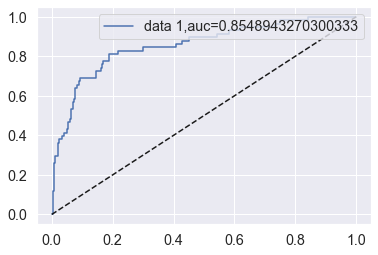

In [24]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=1)
plt.show()

# ROC curve is able to define the model at 0.6% of the data for good classification. 

# Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, X_test, y_test, cv=10)
print("10 fold Cross validation Scores ")    
for i in scores:
    print(i)
print("\n")
#mean of cross-validation
print("Scores",np.mean(scores))

10 fold Cross validation Scores 
0.8378378378378378
0.8648648648648649
0.8108108108108109
0.8918918918918919
0.8378378378378378
0.8378378378378378
0.7837837837837838
0.8648648648648649
0.9166666666666666
0.8611111111111112


Scores 0.8507507507507508


#### As the accuracy changes with data considered in training and testing samples, we go for cross validation which gives us an average accuracy of the overall model. 